## Data Cleaning and Quality Control for Pregnancy Deep Phenotyping Metabolomics Data
##### Kayla Xu, Piekos Lab
##### 1/28/2026

In [1]:
# set up environment
import pandas as pd
import numpy as np
import scipy.stats as sp
from scipy import ndimage as nd
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import logging
import sys

In [65]:
# read in csv files
exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_expression.csv", index_col=0)
batch = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_batch.csv", index_col=0)
comp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_compounds.csv", index_col=0)
#t_exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_exp_test.csv")

1. Convert any blank, "NA", or 0 values for analyte measuremnts to standard missing value

In [66]:
def convert_missing(x):
    try:
        val = float(x)
        if val == 0:
            return np.nan
        else:
            return val
    except:
        return np.nan

exp = exp.map(convert_missing)
exp

,c1,c2,p1,p2,p3,p4,p5,p6,p7,p8,...,p3695,p3696,p3697,p3698,p3699,p3700,p3701,p3702,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Pooled Cntrl,NaN,NaN,1.529698e+09,9.609349e+08,6.969368e+08,6.273636e+08,4.496688e+08,1.627703e+08,1.656823e+08,2.721866e+08,...,27488.284023,7203.652750,7677.504597,1342.107419,9610.930373,39079.646816,32186.048274,1601.922548,4823.045917,2013.510488
Pooled Cntrl,NaN,NaN,1.368645e+09,1.017308e+09,7.297922e+08,6.216437e+08,4.032618e+08,1.658927e+08,1.658927e+08,2.758879e+08,...,23529.385751,7018.815397,10839.720606,1334.575697,2107.552582,37595.243490,14915.134760,1483.575237,4975.115785,1822.346712
Pooled Cntrl,NaN,NaN,1.529095e+09,1.024928e+09,7.537896e+08,6.528907e+08,4.176116e+08,1.691492e+08,1.691136e+08,2.799403e+08,...,32523.477547,6763.429783,16598.414538,1365.399845,9541.553119,41865.668458,30473.225647,1565.337035,10850.491229,1234.040520
Pooled Cntrl,NaN,NaN,1.594295e+09,1.061045e+09,7.727009e+08,6.619380e+08,3.661752e+08,1.678279e+08,1.678279e+08,2.916086e+08,...,35486.556219,5281.358186,6002.694725,1960.021509,3823.302236,27640.514842,34969.834441,2063.441685,3151.114966,1291.215513
Pooled Cntrl,NaN,NaN,1.558062e+09,1.075289e+09,7.655375e+08,6.626260e+08,3.324415e+08,1.634159e+08,1.656492e+08,2.939343e+08,...,36362.884200,5176.081144,3629.736853,1781.069954,3374.391045,23745.862385,23107.849268,9204.205117,5361.216328,1412.393842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0409,399287.829141,1.818930e+07,1.354813e+09,1.521910e+08,5.321273e+08,1.617649e+07,4.847604e+08,2.317692e+06,2.798594e+06,6.827049e+07,...,2476.141617,1718.449783,47208.704015,21672.795377,13064.466449,30018.671239,3779.421277,112197.881939,2141.515525,4221.543097
DP3-0416,435095.699504,2.299017e+07,1.246003e+09,1.441815e+08,3.709081e+08,1.821745e+07,3.968532e+08,2.166746e+06,2.166746e+06,1.160527e+08,...,6645.010324,5135.848653,43469.674374,2321.027123,36859.753509,23856.126696,5112.783090,1738.518821,22113.724282,1038.665688
DP3-0419,272278.020734,1.864842e+07,1.280463e+09,2.599678e+08,7.597815e+08,2.831243e+07,6.925312e+08,2.621542e+06,2.621542e+06,2.159653e+08,...,12111.085549,13529.689066,21175.352211,12954.678928,51933.051727,50097.705991,5257.716925,7674.302380,8809.518392,1021.711583


2. Identify QC vs biological samples and separate these further by batch

In [67]:
is_pooled = ["Pooled" in s for s in exp.index]
pooled = exp.iloc[is_pooled,:]

is_sample = ["Pooled" not in s for s in exp.index]
sample_exp = exp.iloc[is_sample,:]


In [68]:
pooled

,c1,c2,p1,p2,p3,p4,p5,p6,p7,p8,...,p3695,p3696,p3697,p3698,p3699,p3700,p3701,p3702,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Pooled Cntrl,NaN,NaN,1.529698e+09,9.609349e+08,6.969368e+08,6.273636e+08,4.496688e+08,1.627703e+08,1.656823e+08,2.721866e+08,...,27488.284023,7203.652750,7677.504597,1342.107419,9610.930373,39079.646816,32186.048274,1601.922548,4823.045917,2013.510488
Pooled Cntrl,NaN,NaN,1.368645e+09,1.017308e+09,7.297922e+08,6.216437e+08,4.032618e+08,1.658927e+08,1.658927e+08,2.758879e+08,...,23529.385751,7018.815397,10839.720606,1334.575697,2107.552582,37595.243490,14915.134760,1483.575237,4975.115785,1822.346712
Pooled Cntrl,NaN,NaN,1.529095e+09,1.024928e+09,7.537896e+08,6.528907e+08,4.176116e+08,1.691492e+08,1.691136e+08,2.799403e+08,...,32523.477547,6763.429783,16598.414538,1365.399845,9541.553119,41865.668458,30473.225647,1565.337035,10850.491229,1234.040520
Pooled Cntrl,NaN,NaN,1.594295e+09,1.061045e+09,7.727009e+08,6.619380e+08,3.661752e+08,1.678279e+08,1.678279e+08,2.916086e+08,...,35486.556219,5281.358186,6002.694725,1960.021509,3823.302236,27640.514842,34969.834441,2063.441685,3151.114966,1291.215513
Pooled Cntrl,NaN,NaN,1.558062e+09,1.075289e+09,7.655375e+08,6.626260e+08,3.324415e+08,1.634159e+08,1.656492e+08,2.939343e+08,...,36362.884200,5176.081144,3629.736853,1781.069954,3374.391045,23745.862385,23107.849268,9204.205117,5361.216328,1412.393842
Pooled Cntrl,NaN,NaN,1.310788e+09,1.139913e+09,8.275065e+08,6.653570e+08,3.820909e+08,1.701850e+08,1.701826e+08,3.077572e+08,...,26940.711770,8526.107591,15670.523474,1658.127480,2935.502449,28983.022430,37536.088718,1842.760244,6775.526502,1217.134171
Pooled Cntrl,NaN,NaN,1.328624e+09,1.241396e+08,4.799309e+08,4.803465e+07,4.512487e+08,1.140604e+07,1.171756e+07,1.260616e+08,...,12134.477218,15882.200839,50884.781099,10003.679757,29161.370860,49275.668837,7480.893067,4239.181509,24014.717468,9397.871727
Pooled Cntrl,NaN,NaN,1.344193e+09,2.279305e+08,4.879025e+08,4.881737e+07,5.303387e+08,1.037144e+07,1.061512e+07,1.036299e+08,...,7408.349410,12927.539738,41778.589145,8847.085973,23498.426596,45309.560097,3667.167423,4944.474686,16646.426722,6081.293619
Pooled Cntrl,NaN,NaN,1.364611e+09,8.804528e+07,4.159855e+08,4.876951e+07,3.401575e+08,9.723675e+06,1.020546e+07,1.130544e+08,...,8085.967511,15483.316058,42768.345498,12576.481562,33240.692624,42586.358396,3550.747425,3977.297126,26260.233556,9739.957455


In [69]:
pooled['batch'] = batch["batch"][is_pooled]

In [70]:
pooled

,c1,c2,p1,p2,p3,p4,p5,p6,p7,p8,...,p3696,p3697,p3698,p3699,p3700,p3701,p3702,p3703,p3704,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Pooled Cntrl,NaN,NaN,1.529698e+09,9.609349e+08,6.969368e+08,6.273636e+08,4.496688e+08,1.627703e+08,1.656823e+08,2.721866e+08,...,7203.652750,7677.504597,1342.107419,9610.930373,39079.646816,32186.048274,1601.922548,4823.045917,2013.510488,62323
Pooled Cntrl,NaN,NaN,1.368645e+09,1.017308e+09,7.297922e+08,6.216437e+08,4.032618e+08,1.658927e+08,1.658927e+08,2.758879e+08,...,7018.815397,10839.720606,1334.575697,2107.552582,37595.243490,14915.134760,1483.575237,4975.115785,1822.346712,62323
Pooled Cntrl,NaN,NaN,1.529095e+09,1.024928e+09,7.537896e+08,6.528907e+08,4.176116e+08,1.691492e+08,1.691136e+08,2.799403e+08,...,6763.429783,16598.414538,1365.399845,9541.553119,41865.668458,30473.225647,1565.337035,10850.491229,1234.040520,62323
Pooled Cntrl,NaN,NaN,1.594295e+09,1.061045e+09,7.727009e+08,6.619380e+08,3.661752e+08,1.678279e+08,1.678279e+08,2.916086e+08,...,5281.358186,6002.694725,1960.021509,3823.302236,27640.514842,34969.834441,2063.441685,3151.114966,1291.215513,62323
Pooled Cntrl,NaN,NaN,1.558062e+09,1.075289e+09,7.655375e+08,6.626260e+08,3.324415e+08,1.634159e+08,1.656492e+08,2.939343e+08,...,5176.081144,3629.736853,1781.069954,3374.391045,23745.862385,23107.849268,9204.205117,5361.216328,1412.393842,62323
Pooled Cntrl,NaN,NaN,1.310788e+09,1.139913e+09,8.275065e+08,6.653570e+08,3.820909e+08,1.701850e+08,1.701826e+08,3.077572e+08,...,8526.107591,15670.523474,1658.127480,2935.502449,28983.022430,37536.088718,1842.760244,6775.526502,1217.134171,62323
Pooled Cntrl,NaN,NaN,1.328624e+09,1.241396e+08,4.799309e+08,4.803465e+07,4.512487e+08,1.140604e+07,1.171756e+07,1.260616e+08,...,15882.200839,50884.781099,10003.679757,29161.370860,49275.668837,7480.893067,4239.181509,24014.717468,9397.871727,32425
Pooled Cntrl,NaN,NaN,1.344193e+09,2.279305e+08,4.879025e+08,4.881737e+07,5.303387e+08,1.037144e+07,1.061512e+07,1.036299e+08,...,12927.539738,41778.589145,8847.085973,23498.426596,45309.560097,3667.167423,4944.474686,16646.426722,6081.293619,32425
Pooled Cntrl,NaN,NaN,1.364611e+09,8.804528e+07,4.159855e+08,4.876951e+07,3.401575e+08,9.723675e+06,1.020546e+07,1.130544e+08,...,15483.316058,42768.345498,12576.481562,33240.692624,42586.358396,3550.747425,3977.297126,26260.233556,9739.957455,32425


In [71]:
sample_exp['batch'] = batch["batch"][is_sample]

In [72]:
unique_batches = batch["batch"].unique()
exp_data = {} # dictionary of metabolomic expression split by QC/biological sample and batch (e.g. id = "Pooled_32425")
for b in unique_batches:
    exp_data["Pooled_" + str(b)] = pooled[pooled['batch'] == b]
    exp_data["Samples_" + str(b)] = sample_exp[sample_exp['batch'] == b]

3. Check for the internal quality control of samples by using the standard run - these are the yellow boxes with red text in the files. For all biological samples, for each standard calculate the Median Absolute Deviation. FIlter out any sample that is >5 MAD (Threshold = Median - (5xMAD)). Track any samples that fail this test in a log file

In [73]:
# standard runs = 01 and 02, only in samples
batch1 = exp_data["Samples_32425"]
batch2 = exp_data["Samples_62323"]

b1_id = "32425"
b2_id = "62323"

In [74]:
# calculate MAD for each batch and standard run
mad_101 = sp.median_abs_deviation(batch1["c1"])
mad_102 = sp.median_abs_deviation(batch1["c2"])
mad_201 = sp.median_abs_deviation(batch2["c1"])
mad_202 = sp.median_abs_deviation(batch2["c2"])

# calculate median for each batch and standard run
med_101 = nd.median(batch1["c1"])
med_102 = nd.median(batch1["c2"])
med_201 = nd.median(batch2["c1"])
med_202 = nd.median(batch2["c2"])

In [75]:
# create mask of all values that don't pass filter
fail_101 = (batch1["c1"] < med_101 - 5*mad_101) | (batch1["c1"] > med_101 + 5*mad_101)
fail_102 = (batch1["c2"] < med_102 - 5*mad_102) | (batch1["c2"] > med_102 + 5*mad_102)


fail_201 = (batch2["c1"] < med_201 - 5*mad_201) | (batch2["c1"] > med_201 + 5*mad_201)
fail_202 = (batch2["c2"] < med_202 - 5*mad_202) | (batch2["c2"] > med_202 + 5*mad_202)


In [76]:
# generate log file
logging.basicConfig(
    filename='MTBL_cleaning.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filemode='w'  # Use 'w' to overwrite the file each run, or 'a' to append
)
logging.info("Initializing metabolomics cleaning pipeline...")
#logging.warning("Missing metadata in row 45.")
#logging.error("Failed to load reference database.")


In [77]:
# remove samples that fail check
failed = batch1.index[fail_102]
for sample in failed:
    logging.warning("QC: Sample " + sample + "_" + b1_id + " failed Median Absolute Deviation threshold test.")
    batch1 = batch1.drop(index=sample)
    
exp_data["Samples_32425"] = batch1 


4. Filter out any individual biological samples with >50% missingness. Track any samples that fail this test in a log file.

In [78]:
fail_missing = batch1.isna().sum(axis=1) > len(batch1.index)
f = batch1.index[fail_missing]
for s in f:
    logging.warning("QC: Sample " + s + " failed >50% missingness test.")
    batch1 = batch1.drop(index=s)

exp_data["Samples_32425"] = batch1  

5. Calculate relative standard deviation (RSD) in QC Pools (RSD = SD/Mean * 100) - remove any metabolites with an RSD < 30%.


In [79]:
pool1 = exp_data["Pooled_32425"]
pool2 = exp_data["Pooled_62323"]

In [80]:
RSD1 = (pool1.std()/pool1.mean())*100 
RSD2 = (pool2.std()/pool2.mean())*100 

In [135]:
df = pd.DataFrame()
df["1"] = RSD1
df["2"] = RSD2
df2 = df > 30
df2

,1,2
c1,False,False
c2,False,False
p1,False,False
p2,True,False
p3,False,False
...,...,...
p3701,True,False
p3702,True,True
p3703,False,True
p3704,False,False


In [137]:
(df > 30).sum(axis=1) > 0

c1       False
c2       False
p1       False
p2        True
p3       False
         ...  
p3701     True
p3702     True
p3703     True
p3704    False
batch    False
Length: 3707, dtype: bool

In [141]:
failed_RSD = RSD1.index[list(RSD1 > 30) or list(RSD2 > 30)]
list(df.loc[m])

[23.145344719169213, 22.524763812087023]

In [83]:
for m in failed_RSD:
    logging.warning("QC: Compound " + str(m) + " failed the RSD < 30 check\n" + 10*'\t' + "Pooled_32425 RSD = " + str(RSD1[m]) + "\n" + 10*'\t' + "Pooled_62323 RSD = " + str(RSD2[m]))
    exp_data["Pooled_32425"] = exp_data["Pooled_32425"].drop(columns=m)
    exp_data["Pooled_62323"] = exp_data["Pooled_62323"].drop(columns=m)
    exp_data["Samples_32425"] = exp_data["Samples_32425"].drop(columns=m)
    exp_data["Samples_62323"] = exp_data["Samples_62323"].drop(columns=m)


6. Remove any analyses with >20% missingness (note this can be done in the same looping step as the RSD QC check). Double-check that no group has signficantly differential patterns of missingness for discarded analyses

In [154]:
batch1 = exp_data["Samples_32425"].isna().sum()
batch2 = exp_data["Samples_62323"].isna().sum()
df = pd.DataFrame()
df["1"] = batch1
df["2"] = batch2
df.sum(axis=1) / len(df) > 0.2

c1       False
c2       False
p1       False
p3       False
p4       False
         ...  
p3697    False
p3700    False
p3703    False
p3704    False
batch    False
Length: 2457, dtype: bool

In [85]:
for m in batch1.index[(batch1 > 0.2*len(batch1)) | (batch2 > 0.2*len(batch2))]:
    logging.warning("QC: Compound " + str(m) + " failed the <20% missingness check")
    exp_data["Pooled_32425"] = exp_data["Pooled_32425"].drop(columns=m)
    exp_data["Pooled_62323"] = exp_data["Pooled_62323"].drop(columns=m)
    exp_data["Samples_32425"] = exp_data["Samples_32425"].drop(columns=m)
    exp_data["Samples_62323"] = exp_data["Samples_62323"].drop(columns=m)

In [145]:
batch1 = exp_data["Samples_32425"]
batch1

,c1,c2,p1,p3,p4,p5,p6,p7,p8,p9,...,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0025,12.255680,-0.845752,0.463839,0.649596,4.428394,0.018830,1.957348,1.932746,0.306984,0.060842,...,0.431794,-0.111880,0.144009,-0.418217,0.238567,-0.675523,1.674847,-0.041325,-0.048672,NaN
DP3-0034,13.086081,-0.344180,0.433625,0.668324,4.621609,0.132883,1.909245,1.888153,-0.513537,0.042585,...,0.370772,-0.283747,-0.677598,-1.253325,0.489705,-0.516978,-0.545158,0.444496,-0.104625,NaN
DP3-0048,12.405454,-0.669505,1.783564,0.350979,4.201363,-0.524330,1.720420,1.705287,1.035945,-0.052897,...,-0.103484,0.117262,-0.313407,-1.479666,-0.264579,-1.462199,-0.024466,-0.382275,0.046245,NaN
DP3-0080,12.144207,-0.645785,0.344973,1.246599,5.086863,-0.256040,1.951954,1.940840,1.210992,1.456728,...,0.407797,-0.040447,0.165589,-0.502268,0.794780,-1.667808,0.213255,-1.167525,2.929307,NaN
DP3-0092,12.254508,-1.100720,1.015769,0.931490,4.706908,-0.197967,1.933694,1.909313,-0.255781,-0.101173,...,-0.580420,-1.051616,-0.449280,-1.402094,0.509546,-0.563539,-0.131616,0.022196,-0.135173,NaN
DP3-0105,12.537324,-1.072846,1.070197,0.667863,4.685591,-0.280645,2.306521,2.284681,0.452687,0.103421,...,-1.043727,-0.339313,0.452845,-0.973723,-0.318151,-0.582283,1.299783,-1.008703,0.096078,NaN
DP3-0112,12.368255,-0.753471,0.920004,0.125832,5.230369,0.125010,2.389507,2.366559,0.206693,0.161399,...,0.433527,1.483958,0.676284,-0.257243,0.749098,-1.045531,-0.701678,-0.198121,0.007526,NaN
DP3-0124,12.764763,0.347674,0.953587,0.127343,4.899768,-1.356641,1.674686,1.658242,-0.176923,-1.914299,...,-1.791561,-1.747071,-1.276804,-1.119941,-0.867952,-3.222476,-1.386798,-1.117603,-0.071882,NaN
DP3-0140E,12.165268,-0.679769,1.369898,1.078742,5.023813,-0.092216,2.272847,2.252877,1.658330,-0.367243,...,-0.065576,-1.490623,-0.086306,-0.779534,0.315654,-1.000081,-0.210529,-0.969947,0.035026,NaN


7. Generate non-batch corrected PCA plot (for comparison to after batch normalization in which the color of the sample dots are the batches they were run in

In [86]:
all_data = pd.concat([exp_data["Samples_32425"], exp_data["Samples_62323"]])


In [87]:
batch = all_data["batch"]
all_data = all_data.drop(["batch"], axis=1)

In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

In [89]:
# 3. Apply PCA
# We want to reduce the data to 2 dimensions for plotting
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [90]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [91]:
pca_df['batch'] = list(batch)

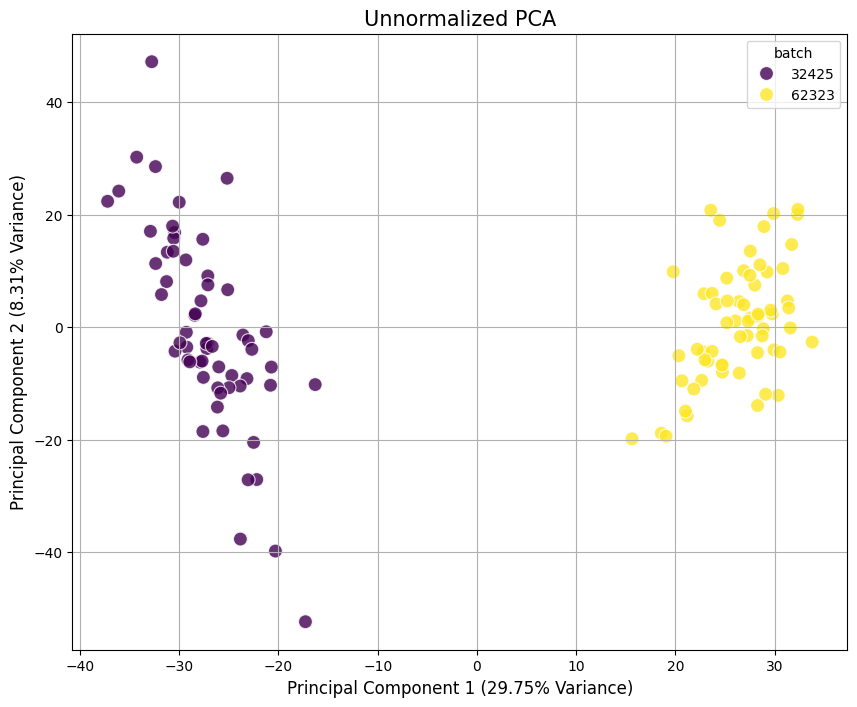

In [92]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='batch', 
    data=pca_df, 
    palette='viridis', 
    s=100,      # Marker size
    alpha=0.8   # Transparency
)

# Add titles and labels
plt.title('Unnormalized PCA', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)', fontsize=12)
plt.grid(True)
plt.show()

8. Batch normalization: good news we have biological replicates run in both batches so we can do a much better way to batch normalize than quantile normalization!
    1. Identify the batch replicates (sample IDs that appear in both batches) - log how many batch replicates we have.
    2. Calculate the ratio for each sample replicate pair (batch 2 value / batch 1 value) for each metabolite. Store these in a list for each metabolite making sure to exclude any outliers.
    3. Take the median ratio for each metabolite
    4. Calculate the correction factor (Correction factor = 1 / Median ratio) for each metabolite
    5. Apply the correction factor to all batch 2 samples

In [93]:
batch1 = exp_data["Samples_32425"].drop(['batch'], axis=1)
batch2 = exp_data["Samples_62323"].drop(['batch'], axis=1)

In [94]:
replicates = list(set(batch1.index) & set(batch2.index))

In [95]:
logging.info("Initializing batch normalization with " + str(len(replicates)) + " biological replicates.")

In [96]:
rep1 = batch1.loc[replicates,:]
rep2 = batch2.loc[replicates,:]

In [97]:
ratios = rep2 / rep1

In [98]:
mad = sp.median_abs_deviation(ratios)

In [99]:
med = ratios.median()

In [100]:
upper = med + 5*mad
lower = med - 5*mad

In [101]:
ratios

,c1,c2,p1,p3,p4,p5,p6,p7,p8,p9,...,p3683,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0092,21.335718,0.540293,1.022377,1.929408,28.870359,1.476356,62.352444,62.352444,4.751950,0.829494,...,0.609230,13.114077,3.274742,0.205171,0.325069,0.107044,0.422524,0.972356,11.084421,1.237882
DP3-0124,23.738560,0.682314,1.221521,1.639151,3.110994,1.301464,8.678023,8.778507,3.377310,1.199570,...,1.481887,2.924076,1.712806,1.473882,0.235058,1.178243,0.113298,1.005408,1.841836,1.453490
DP3-0140E,19.776105,0.916396,1.122072,1.707732,1.173767,0.910117,0.619078,0.625547,3.035255,1.209644,...,0.190007,0.400973,0.914518,6.325738,0.209537,3.021630,0.085662,0.506995,1.087354,1.317587
DP3-0105,26.422342,0.860653,1.003347,2.036985,40.798049,0.778172,108.941282,89.719960,2.127273,0.861805,...,0.722768,8.257657,0.387121,0.369152,0.220261,1.790765,0.217754,0.820318,1.832559,1.024392
DP3-0080,22.563051,0.863062,1.071519,1.740343,52.967769,1.065540,53.919270,54.821262,1.518249,1.078197,...,0.686187,1.072402,0.083063,0.960464,0.199193,5.793056,0.637471,0.920490,1.120456,0.093572
DP3-0048,24.477570,0.658722,1.305646,1.429702,23.792580,1.291109,45.531905,46.093534,2.461956,0.831503,...,0.705208,0.705142,0.261848,0.125628,0.374451,0.306075,0.375887,0.658188,0.638205,0.794440
DP3-0034,24.834524,0.687263,1.117366,1.709691,14.227123,0.943159,84.143403,61.771536,3.883712,0.912178,...,0.507146,0.638643,0.355536,0.273873,0.296701,3.467569,0.069408,1.054171,1.588717,1.256206
DP3-0025,17.510866,0.691397,1.168563,1.389080,37.486665,1.256765,62.778945,62.760143,2.138320,0.934097,...,6.098890,1.024372,4.137581,0.098330,0.188809,0.097465,0.352762,0.745145,16.693045,1.199419
DP3-0112,18.494015,0.769220,1.065993,1.541477,8.344704,0.877551,126.720617,126.931762,1.616746,0.847075,...,0.912400,0.591423,1.466717,0.056104,0.092524,1.348631,0.079487,0.639205,0.164232,1.520793


In [102]:
med_ratios = {}
# calculate median ratio, excluding outilers from this calculation (should outliers be removed completely?)
for m in ratios.columns:
    temp = ratios.loc[list(ratios[m] < upper[m]) and list(ratios[m] > lower[m]), m]
    med_ratios[m] = temp.median()

In [103]:
correction_factors = {k: 1/v for k, v in med_ratios.items()}

In [104]:
len(correction_factors)
batch2 = exp_data["Samples_62323"].drop(['batch'], axis=1)

In [105]:
exp_data["Samples_62323"]

,c1,c2,p1,p3,p4,p5,p6,p7,p8,p9,...,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,8.436382e+06,1.447375e+07,1.247337e+09,8.281549e+08,9.628540e+08,4.579460e+08,3.126090e+08,3.142139e+08,4.927527e+08,3.211056e+08,...,37196.560024,4266.034504,99306.867064,3833.914229,9194.898087,8336.272703,38383.510457,15459.760781,4916.854851,62323
DP3-0006,6.674424e+06,1.927914e+07,1.492164e+09,7.740998e+08,7.966310e+08,3.156852e+08,2.166436e+08,2.166436e+08,6.133045e+08,3.084772e+08,...,49361.266374,5694.102941,3850.591238,2957.639327,1343.087239,7218.601850,17684.706659,3279.244848,1278.523467,62323
DP3-0008,8.583922e+06,1.423674e+07,1.559996e+09,6.817128e+08,1.065199e+09,3.567307e+08,1.831011e+08,1.829947e+08,2.805975e+08,3.213215e+08,...,62468.577038,4729.821357,5839.798563,3131.563959,2332.538506,2573.029832,35550.827300,3779.328999,1405.460092,62323
DP3-0009,8.290102e+06,1.836940e+07,1.542945e+09,9.570523e+08,1.056063e+09,3.998839e+08,3.511506e+08,3.514956e+08,2.865585e+08,3.547090e+08,...,56845.235587,9379.968339,15923.925284,4174.793195,13334.164474,12332.650348,32488.417587,2873.676525,1403.505084,62323
DP3-0018,8.711981e+06,1.355397e+07,1.409601e+09,6.340394e+08,6.781203e+08,3.471597e+08,1.652853e+08,1.652363e+08,2.081478e+08,2.304043e+08,...,28345.266314,40010.830041,23234.828346,3299.711969,2514.080921,10125.828073,14788.951312,24541.593661,1761.570324,62323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0207,9.236214e+06,2.230477e+07,1.495130e+09,8.805280e+08,1.263659e+08,3.815519e+08,1.134952e+08,1.152401e+08,3.671921e+08,3.199098e+08,...,26392.291051,2642.884354,3765.154536,4413.821661,12690.770027,6978.065040,14036.590334,4155.713979,1733.027545,62323
DP3-0214,9.642997e+06,1.512005e+07,1.327888e+09,9.775059e+08,9.221463e+07,3.692448e+08,1.527368e+08,1.548590e+08,4.470803e+08,2.696772e+08,...,32247.194328,2631.773549,4225.533087,4219.620909,2047.508529,4112.977327,51544.130127,2638.198882,1297.274780,62323
DP3-0216,9.147465e+06,1.617194e+07,1.485198e+09,8.836420e+08,6.580719e+07,3.300190e+08,1.641770e+08,1.667250e+08,4.885249e+08,2.446083e+08,...,36595.363486,4122.299687,3496.334354,3294.055723,3340.626069,6506.790316,15263.472193,2938.756211,1175.484388,62323


In [106]:
for m in batch2.columns:
    exp_data["Samples_62323"][m] = batch2[m]*correction_factors[m]

In [107]:

exp_data["Samples_62323"]

,c1,c2,p1,p3,p4,p5,p6,p7,p8,p9,...,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,373902.527352,2.093408e+07,1.116319e+09,4.849444e+08,4.046867e+07,4.297786e+08,5.013581e+06,5.086709e+06,2.001469e+08,3.520209e+08,...,36311.562887,4664.788524,362602.028264,17406.215046,6817.947207,38283.038219,46791.030701,9730.972075,3942.806578,62323
DP3-0006,295812.105480,2.788433e+07,1.335430e+09,4.532912e+08,3.348233e+07,2.962679e+08,3.474501e+06,3.507175e+06,2.491128e+08,3.381767e+08,...,48186.841121,6226.341119,14059.774860,13427.871120,995.889003,33150.308338,21558.363015,2064.083687,1025.242943,62323
DP3-0008,380441.532572,2.059127e+07,1.396138e+09,3.991920e+08,4.477024e+07,3.347888e+08,2.936550e+06,2.962444e+06,1.139734e+08,3.522575e+08,...,60982.296807,5171.926379,21323.024945,14217.500040,1729.559615,11816.240052,43337.876911,2378.856017,1127.032923,62323
DP3-0009,367419.382490,2.656853e+07,1.380878e+09,5.604231e+08,4.438622e+07,3.752877e+08,5.631706e+06,5.690252e+06,1.163947e+08,3.888595e+08,...,55492.748402,10256.731073,58143.487721,18953.827284,9887.181845,56635.782136,39604.677285,1808.803281,1125.465210,62323
DP3-0018,386117.169284,1.960375e+07,1.261540e+09,3.712758e+08,2.850134e+07,3.258065e+08,2.650822e+06,2.674958e+06,8.454573e+07,2.525871e+08,...,27670.863102,43750.715239,84837.998959,14980.902727,1864.171939,46501.293437,18028.321710,15447.429359,1412.596318,62323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0207,409351.297026,3.226045e+07,1.338085e+09,5.156126e+08,5.311147e+06,3.580833e+08,1.820221e+06,1.865587e+06,1.491465e+08,3.507099e+08,...,25764.353897,2889.919571,13747.817365,20039.031762,9410.109742,32045.680381,17111.163659,2615.767298,1389.707976,62323
DP3-0214,427379.990402,2.186885e+07,1.188410e+09,5.724002e+08,3.875773e+06,3.465332e+08,2.449572e+06,2.506963e+06,1.815956e+08,2.956411e+08,...,31479.954705,2877.770219,15428.810848,19157.347965,1518.212048,18888.209853,62834.351171,1660.584534,1040.279546,62323
DP3-0216,405417.909124,2.339024e+07,1.329196e+09,5.174361e+08,2.765870e+06,3.097201e+08,2.633048e+06,2.699059e+06,1.984296e+08,2.681586e+08,...,35724.670285,4507.618551,12766.266479,14955.223006,2477.048898,29881.424374,18606.781597,1849.766955,942.616310,62323


9. Generate batch corrected PCA plot in which the color of the sample dots match the batches they were run in - this should show more overlap across the two samples than the non-batch normalized data

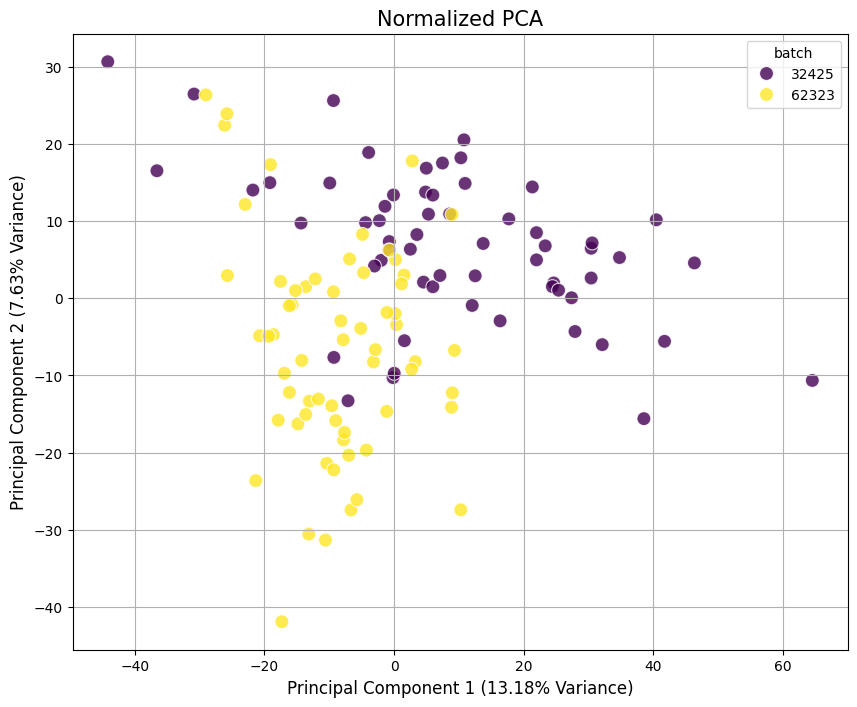

In [108]:
all_data = pd.concat([exp_data["Samples_32425"], exp_data["Samples_62323"]])
batch = all_data["batch"]
all_data = all_data.drop(["batch"], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)
# 3. Apply PCA
# We want to reduce the data to 2 dimensions for plotting
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['batch'] = list(batch)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='batch', 
    data=pca_df, 
    palette='viridis', 
    s=100,      # Marker size
    alpha=0.8   # Transparency
)

# Add titles and labels
plt.title('Normalized PCA', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)', fontsize=12)
plt.grid(True)
plt.show()

10. For the samples ran in both batches, average the two samples.


In [109]:
rep_avg = (rep1 + rep2)/2

In [110]:
exp_data["Samples_32425"].loc[rep_avg.index,:] = rep_avg
exp_data["Samples_62323"].loc[rep_avg.index,:] = rep_avg

11. Perform Log2 Transformation

In [111]:
exp_data["Samples_32425"]= np.log2(exp_data["Samples_32425"])
exp_data["Samples_62323"] = np.log2(exp_data["Samples_62323"])

12. Peform median normalization (subtract median and divide by IQR) - Do this after log2?

In [112]:
exp_data["Samples_62323"] = (exp_data["Samples_62323"] - exp_data["Samples_62323"].median()) / (exp_data["Samples_62323"].quantile(0.75) - exp_data["Samples_62323"].quantile(0.25))
exp_data["Samples_32425"] = (exp_data["Samples_32425"] - exp_data["Samples_32425"].median()) / (exp_data["Samples_32425"].quantile(0.75) - exp_data["Samples_32425"].quantile(0.25))

In [113]:
exp_data["Samples_62323"]

,c1,c2,p1,p3,p4,p5,p6,p7,p8,p9,...,p3684,p3690,p3691,p3693,p3696,p3697,p3700,p3703,p3704,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,-0.891167,-0.282220,-1.357027,0.047471,0.165531,1.368287,0.528508,0.525807,0.692924,0.435911,...,-0.625534,0.019285,4.695264,0.007087,0.549642,0.260206,0.495002,1.220753,10.920564,NaN
DP3-0006,-3.910678,1.023631,0.017950,-0.280563,0.077929,-0.907964,0.216996,0.206814,1.050268,0.234242,...,0.074400,0.344236,-0.350606,-0.967999,-0.712057,0.099572,-0.705434,-0.024509,-0.280381,NaN
DP3-0008,-0.667706,-0.357429,0.359025,-0.898209,0.212226,-0.160022,0.074096,0.062000,-0.226480,0.439289,...,0.656951,0.135428,0.295997,-0.753284,-0.350021,-1.051526,0.376241,0.089473,0.506774,NaN
DP3-0009,-1.116611,0.803454,0.274706,0.750482,0.208244,0.538711,0.627273,0.622000,-0.192157,0.936176,...,0.423603,0.905966,1.853432,0.327156,0.793419,0.697216,0.236699,-0.130531,0.495199,NaN
DP3-0018,-0.476841,-0.581287,-0.418753,-1.250533,0.003475,-0.326432,-0.012863,-0.025578,-0.714152,-1.232524,...,-1.297778,2.538418,2.440043,-0.556750,-0.300863,0.477211,-0.982442,1.591874,2.384800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP3-0207,0.276298,1.687642,0.033186,0.345483,-0.773181,0.251568,-0.332202,-0.334737,0.212682,0.417157,...,-1.474371,-0.519564,-0.385443,0.536366,0.760983,0.061756,-1.063325,0.165715,2.248957,NaN
DP3-0214,0.831811,-0.083237,-0.876909,0.853250,-0.918821,0.050950,-0.079937,-0.081224,0.534103,-0.441418,...,-0.978742,-0.524305,-0.206342,0.367289,-0.435504,-0.528116,0.951690,-0.199190,-0.159305,NaN
DP3-0216,0.151851,0.223111,-0.017950,0.362640,-1.074781,-0.636257,-0.018579,-0.017882,0.678854,-0.931832,...,-0.665842,-0.019285,-0.500448,-0.563197,-0.114429,-0.016271,-0.933519,-0.112547,-0.979112,NaN


13. Combine the POS and NEG compounds (these were evaluated using two different modes)
    1. Identify compounds present in both
    2. Check the correlation between the POS and NEG values
        1. if it is r>=0.9. Then average the two samples (or in the case that one is missing for a sample take the non-missing value)
        2. If r<0.9 then keep each one sepeate and append _POS or _NEG to the compound name

In [114]:
abs(batch1.corrwith(batch2)) > 0.9

c1       False
c2       False
p1       False
p3       False
p4       False
         ...  
p3696    False
p3697    False
p3700     True
p3703    False
p3704     True
Length: 2456, dtype: bool

### Script function testing

In [115]:
# read in csv files
pos_exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_expression.csv", index_col=0)
pos_batch = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_batch.csv", index_col=0)
pos_comp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/pos_compounds.csv", index_col=0)

# read in csv files
neg_exp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/neg_expression.csv", index_col=0)
neg_batch = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/neg_batch.csv", index_col=0)
neg_comp = pd.read_csv("/Users/kaylaxu/Desktop/data/clean_data/MTBL_placenta/neg_compounds.csv", index_col=0)


In [116]:
# converts improper or missing expression data to np.nan values
def convert_missing(x):
    try:
        val = float(x)
        if val == 0:
            return np.nan
        else:
            return val
    except:
        return np.nan

# replace inappropriate values with np.nan
def handle_missing(exp1, exp2):
    exp1 = exp1.map(convert_missing)
    exp2 = exp2.map(convert_missing)
    return exp1, exp2

def split_exp(exp, batch, e, exp_data):
    is_pooled = ["Pooled" in s for s in exp.index]
    pooled = exp.iloc[is_pooled,:]
    pooled['batch'] = batch["batch"][is_pooled]

    is_sample = ["Pooled" not in s for s in exp.index]
    sample = exp.iloc[is_sample,:]
    sample['batch'] = batch["batch"][is_sample]

    unique_batches = batch["batch"].unique()
    for b in unique_batches:
        exp_data["Pooled_" + str(b) + "_" + e] = pooled[pooled['batch'] == b]
        exp_data["Samples_" + str(b) + "_" + e] = sample[sample['batch'] == b]


# calculate the median absolute deviation and identify samples that fail threshold
def mad_failed(c):
    mad = sp.median_abs_deviation(c)
    med = nd.median(c)
    return (c < med - 5*mad) | (c > med + 5*mad) 

# filter out samples with >5 median absolute deviation in internal controls (01 and 02)
def controls_MAD(dict):
    for temp in dict.keys():
        if "Samples" in temp:
            mask = mad_failed(dict[temp]["c1"]) | mad_failed(dict[temp]["c2"]) # mask of samples that failed the internal control for either c1 or c2
            for s in dict[temp].index[mask]:
                print(s + " in " + temp + " failed") #logging.warning("QC: Sample " + s + " failed Median Absolute Deviation threshold test.")
                dict[temp] = dict[temp].drop(index=s)


# helper function for data cleaning
def clean(pos_exp, pos_batch, pos_comp, neg_exp, neg_batch, neg_comp):
    # handle missing
    pos_exp, neg_exp = handle_missing(pos_exp, neg_exp)
    # split batches and pools
    exp_data = {}
    split_exp(pos_exp, pos_batch, "pos", exp_data) # naming format = [Pooled, Samples]_[batch]_[charge]
    split_exp(neg_exp, neg_batch, "neg", exp_data)
    # MAD test 
    controls_MAD(exp_data)
    return exp_data

In [117]:
x, y = clean(pos_exp, pos_batch, pos_comp, neg_exp, neg_batch, neg_comp)

DP3-0006 in Samples_62323_pos failed
DP3-0056 in Samples_62323_pos failed
DP3-0056 in Samples_32425_pos failed
DP3-0300 in Samples_32425_pos failed
DP3-0006 in Samples_62323_neg failed
DP3-0018 in Samples_62323_neg failed
DP3-0056 in Samples_62323_neg failed
DP3-0111 in Samples_62323_neg failed
DP3-0140E in Samples_62323_neg failed
DP3-0056 in Samples_32425_neg failed
DP3-0313 in Samples_32425_neg failed
DP3-0420 in Samples_32425_neg failed


ValueError: too many values to unpack (expected 2)

In [ ]:
for temp in y.keys():
    print(temp)

Pooled_62323_pos
Samples_62323_pos
Pooled_32425_pos
Samples_32425_pos
Pooled_62323_neg
Samples_62323_neg
Pooled_32425_neg
Samples_32425_neg


In [ ]:
y["Samples_62323_neg"]

,c1,c2,n1,n2,n3,n4,n5,n6,n7,n8,...,n1723,n1724,n1725,n1726,n1727,n1728,n1729,n1730,n1731,batch
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DP3-0005,474090.838683,1.270624e+06,1.734116e+09,3.859874e+08,7.527687e+08,4.615068e+08,3.813750e+08,1.495604e+08,3.401780e+08,9.718983e+07,...,53467.585512,34247.069568,6107.476302,93462.466038,73575.138990,8698.226833,17878.413675,7646.490572,15689.037093,62323
DP3-0008,368784.876650,8.654819e+05,1.708645e+09,3.683838e+08,6.564555e+08,4.927522e+08,3.395124e+08,1.281775e+08,3.012030e+08,7.534784e+07,...,90751.867236,41011.974738,8422.036177,72445.001892,89168.776629,20099.694062,8047.390077,41100.230114,27320.983947,62323
DP3-0009,435194.747858,8.516351e+05,1.922210e+09,4.888402e+08,6.063509e+08,5.461226e+08,3.164989e+08,1.382405e+08,2.838219e+08,7.774317e+07,...,77033.402479,25955.000085,12865.010775,41856.369215,71940.772785,16706.771804,22462.661560,41993.144623,28449.237256,62323
DP3-0024,436162.396896,1.106958e+06,2.056218e+09,4.952171e+08,7.269371e+08,5.334310e+08,3.524448e+08,1.327922e+08,3.151428e+08,6.955781e+07,...,59515.579164,3578.483540,28080.365273,41682.602348,65820.035684,6674.968464,69252.303611,21002.191609,23371.432167,62323
DP3-0025,468489.052674,9.086197e+05,1.874129e+09,3.452968e+08,6.992362e+08,5.312970e+08,3.552542e+08,1.299182e+08,3.171202e+08,8.471302e+07,...,91283.981990,3064.102329,17289.316634,40016.505211,133862.080411,14170.293919,2630.175673,40454.729611,24767.015220,62323
DP3-0027,424724.828465,7.437988e+05,1.748774e+09,5.169971e+08,5.970756e+08,5.155887e+08,3.081218e+08,2.044272e+08,2.725815e+08,7.754916e+07,...,62865.927518,24139.968628,24832.868936,99569.243152,80385.288567,56158.129576,29137.491691,8619.364526,14473.437164,62323
DP3-0028,459114.693309,9.840666e+05,2.086119e+09,4.914899e+08,6.571761e+08,5.617125e+08,3.384756e+08,1.352992e+08,3.005219e+08,7.487363e+07,...,30129.463710,12293.465743,21790.997953,35368.504987,105999.161581,11433.586195,4371.844748,5607.499979,49491.432733,62323
DP3-0029E,463170.869633,8.328570e+05,1.972827e+09,4.232988e+08,7.011020e+08,5.339645e+08,3.688472e+08,1.187093e+08,3.274122e+08,9.181041e+07,...,76089.432086,62751.929705,7163.848664,71395.033403,107371.553089,8636.624345,71785.516920,61730.946650,40787.060786,62323
DP3-0034,543899.066610,8.606726e+05,2.007516e+09,3.264831e+08,6.962601e+08,5.710588e+08,3.643747e+08,1.241830e+08,3.269386e+08,8.052608e+07,...,80564.514948,11941.879589,16389.353659,18289.295361,101215.522572,20622.369691,41635.922541,47703.388884,60572.246964,62323


In [ ]:
x = ["Pooled" in k for k in exp_data.keys()]

In [ ]:
keys = list(exp_data.keys())

In [ ]:
keys[x]

TypeError: list indices must be integers or slices, not list

In [ ]:
from itertools import compress

In [ ]:
list(compress(list(exp_data.keys()), ["Pooled" in k for k in exp_data.keys()]))

['Pooled_62323', 'Pooled_32425']

In [156]:
exp_data["Sample" in x for x in exp_data.keys]

SyntaxError: invalid syntax (3555892934.py, line 1)

In [175]:
list(exp_data.keys())

['Pooled_62323', 'Samples_62323', 'Pooled_32425', 'Samples_32425']

In [169]:
["Sample" in x for x in exp_data.keys()]

[False, True, False, True]

In [171]:
from itertools import compress

In [177]:
list(compress(list(exp_data.keys()), ["Sample" in x for x in exp_data.keys()]))

['Samples_62323', 'Samples_32425']